In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch11. 데이터프레임과 시리즈(Pandas)</font></b>
# 9절 데이터그룹화 및 집계

In [3]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 groupby
cf. pivot_table

In [11]:
# 1) 그룹화방법1
#    df.groupby(by=[그룹핑할 열])[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
iris_grouped = iris.groupby(by='Species')
iris_grouped = iris.groupby(by=iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum # iris.groupby(by='Species').sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [12]:
# setosa와 virginica의 종별 합
iris_grouped_sum.loc[['setosa', 'virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [17]:
iris_grouped_sum.reset_index(inplace=True)
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [20]:
# setosa와 virginica의 종별 합
iris_grouped_sum[(iris_grouped_sum['Species']=='setosa' ) | 
                 (iris_grouped_sum['Species']=='virginica' )]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [21]:
iris_grouped_sum[iris_grouped_sum['Species'].isin(['setosa','virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [23]:
# 1) 그룹화방법1-1 : 그룹핑할 때 index를 컬럼으로 편입
#    df.groupby(by=[그룹핑할 열], as_index=False)[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
iris.groupby('Species', as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [ ]:
# 1) 그룹화방법1 : 그룹핑할 때 index를 컬럼으로 편입
#    df.groupby(by=[그룹핑할 열])[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
# 2) 그룹화방법2 
#    df.pivot_table(index='그룹화할 열',
                #   values=[함수적용해서출력할열들],
                #   aggfunc='기초통계함수')

In [10]:
iris.pivot_table(index='Species',
                 # values=['Sepal.Length'],
                aggfunc='count')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


### 다중열 그룹화

In [15]:
# iris를 다중열로 그룹화하기 위해 데이터 추가(num필드)
# 0-25개, 1-25개, 2-25개, 3-25개, 4-25개, 5-5개
import numpy as np
np.array([[i]*25 for i in range(6)]).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [18]:
iris['num'] = np.array([[i]*25 for i in range(6)]).ravel()
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [19]:
# Species별, num별 합계
r = iris.groupby(by=['Species', 'num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         87.0          36.5          6.2
           1           124.6         84.4          36.6          6.1
versicolor 2           150.3         69.4         107.8         33.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         141.0         51.1
           5           165.0         75.5         136.6         50.2

In [20]:
r.loc[['setosa','virginica']]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         141.0         51.1
          5           165.0         75.5         136.6         50.2

In [22]:
r.loc[[ ('setosa',0), ('virginica',4)] ]

,,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,num,,,,
setosa,0,125.7,87.0,36.5,6.2
virginica,4,164.4,73.2,141.0,51.1


In [24]:
# Species별, num별 합계(그룹핑할 열을 컬럼 데이터로)
iris.groupby(by=['Species', 'num'], 
             as_index=False)[['Sepal.Length','Sepal.Width']].sum()

,Species,num,Sepal.Length,Sepal.Width
0,setosa,0,125.7,87.0
1,setosa,1,124.6,84.4
2,versicolor,2,150.3,69.4
3,versicolor,3,146.5,69.1
4,virginica,4,164.4,73.2
5,virginica,5,165.0,75.5


In [25]:
iris.pivot_table(index=['Species', 'num'],
                values=['Sepal.Length','Sepal.Width'],
                aggfunc='sum')

Sepal.Length  Sepal.Width
Species    num                           
setosa     0           125.7         87.0
           1           124.6         84.4
versicolor 2           150.3         69.4
           3           146.5         69.1
virginica  4           164.4         73.2
           5           165.0         75.5

In [28]:
iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe()

Sepal.Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [29]:
iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [31]:
g = iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].sum()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


https://stackoverflow.com/questions/30490740/move-legendoutside-figure-in-seaborn-tsplot :
범례사용 (시각화 20page)

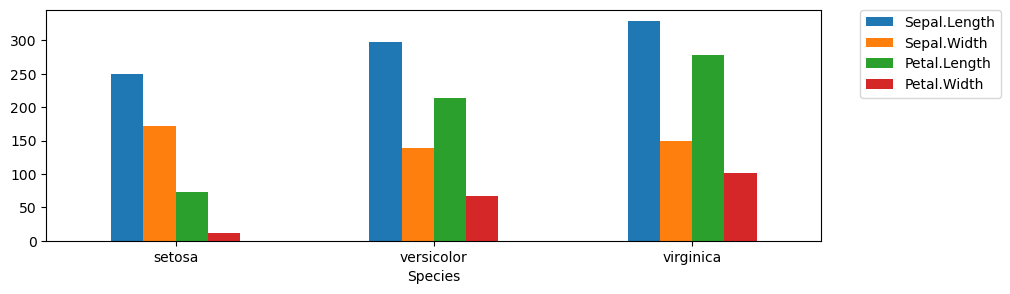

In [38]:
import matplotlib.pyplot as plt
g.plot(kind='bar',figsize=(10,3), rot=0)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 9.2 그룹간 데이터 처리

In [41]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [42]:
# 종별 상위 3개씩 출력
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.head(3))

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


In [44]:
# 종별 임의로 3개씩 출력
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.sample(3).sort_index())

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
5,5.4,3.9,1.7,0.4,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
49,5.0,3.3,1.4,0.2,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
55,5.7,2.8,4.5,1.3,versicolor,2
59,5.2,2.7,3.9,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
137,6.4,3.1,5.5,1.8,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5
145,6.7,3.0,5.2,2.3,virginica,5


In [45]:
# 종별 0, 10, 20, 30, 40번째 출력
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.iloc[[0,10,20,30,40]])

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터프레임 그룹 인덱싱
- 종별 0, 10, 20, 30, 40번째 추출

In [46]:
iris.groupby('Species').take([0,10,20,30,40])

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

# 10절 데이터 구조 변경
- 와이드포맷 <-> 롱포맷(교안 65page)
- 판다스 공식 문서의 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long
- Tidy Data : https://vita.had.co.nz/papers/tidy-data.pdf

In [49]:
from statsmodels.api import datasets
airquality = datasets.get_rdataset('airquality').data
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


## 10.1 melt를 이용한 언피벗팅(와이드포맷 -> 롱포맷)

In [64]:
# airquality.melt(id_vars=['Month', 'Day'])
airquality_melted = airquality.melt(id_vars=['Month', 'Day'],
               var_name='변수명',
               value_name='값').sort_values(by=['Month', 'Day'])
airquality_melted.reset_index(drop=True, inplace=True)
airquality_melted.head()

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


## 10.2 pivot_table을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [75]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                             columns='변수명',
                             values='값')
airquality2.reset_index(inplace=True)

In [77]:
airquality2.columns.name = None
airquality2.head()

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


# 11절 데이터프레임에 함수 적용시키기
- apply(func, axis) : (데이터프레임이나 시리즈 모두 적용 가능)
- applymap(func) : 각 요소별로 적용(데이터프레임에서만 가능)
- map(func) : 각 요소별로 적용(1차원 시리즈에서만 가능)
## 11.1 apply / map

In [78]:
# ex1. 1차원 시리즈에 apply사용
import pandas as pd
member = pd.read_csv('data/ch11_member.csv', comment='#')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [84]:
# 1999-01-30문자를 1999숫자로 return
def parse_year(datestr):
    return int(datestr.split('-')[0])
parse_year("1999-01-30")

1999

In [86]:
# 1999-01-30문자를 1숫자로 return
def parse_month(datestr):
    return int(datestr.split('-')[1])
parse_month = lambda datastr : int(datestr.split('-')[1])
parse_month("1999-01-30")

1

In [97]:
member['년'] = member['Birth'].apply(lambda datestr : int(datestr.split('-')[0]))
member['월'] = member['Birth'].map(lambda datestr : int(datestr.split('-')[1]))
member

,Name,Age,Email,Address,Birth,년,월
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999,1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999,12
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999,11
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999,5
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999,1


In [100]:
# ex2. 2차원 데이터프레임에 apply(func, axis)
%ls "D:\ai\downloads\shareData\부동산"

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: B2C0-28EF

 D:\ai\downloads\shareData\부동산 디렉터리

2025-10-13  오전 09:35    <DIR>          .
2025-10-13  오전 09:35    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-10-12  오후 05:04           412,552 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
               2개 파일             414,715 바이트
               2개 디렉터리  492,702,806,016 바이트 남음


In [101]:
df_last = pd.read_csv(r'D:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [108]:
row = df_last.iloc[0]
row

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [110]:
row.지역명, row['지역명']

('서울', '서울')

In [120]:
def year_month(series):
    return str(series['연도'])+'년'+str(series['월'])+'월'
year_month(df_last.iloc[300])

'2016년1월'

In [125]:
df_last['연도월'] = \
    df_last.apply(lambda series : str(series['연도'])+'년'+str(series['월'])+'월', axis=1)

In [124]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60제곱미터이하,2015,10,5652,2015년10월
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,2015년10월
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,2015년10월
4,서울,전용면적 102제곱미터초과,2015,10,5879,2015년10월


## 11.2 applymap

In [128]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [130]:
X.applymap(lambda  x : x**2).head()

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04


In [131]:
import numpy as np
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


### ※ melt() 및 함수적용하기 연습예제

- 와이드포맷 -> 롱포맷(melt)
- 2013년12월 -> 2013과 12나눠 '연도'와 '월' 컬럼 (apply, map)
- 평당분양가격/3.3, 컬럼명 조정 => new_first
- df_last['규모구분']=='모든면적' 추출 => new_last
- pd.concat( [new_first, new_last] )

In [4]:
# 2013년 ~ 2015년 8월(와이드포맷)
import pandas as pd
import numpy as np
df_first = pd.read_csv('D:/ai/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                     encoding='cp949')
print(df_first.shape)
df_first.head(1)

(17, 22)


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [5]:
# 2015년 10월 ~ 2024년(롱포맷)
df_last = pd.read_csv(r'D:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [11]:
# 와이드포맷 -> 롱포맷(melt)
new_first = df_first.melt(id_vars='지역',
             var_name='연도월',
             value_name='평당분양가격')
new_first.head(1)

,지역,연도월,평당분양가격
0,서울,2013년12월,18189


In [18]:
# 2013년12월 -> 2013과 12나눠 '연도'와 '월' 컬럼 (apply, map)
(lambda datestr : int(datestr.split("년")[0]))("2013년12월")
(lambda datestr : int(datestr.split("년")[-1][:-1]))("2013년12월")
new_first['연도'] \
    = new_first['연도월'].apply(lambda datestr : int(datestr.split("년")[0]))
new_first['월'] \
    = new_first['연도월'].apply(lambda datestr : int(datestr.split("년")[-1][:-1]))
new_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [29]:
new_first.isnull().sum() # 결측치 갯수 new_first.isna().sum()

지역            0
연도월           0
평당분양가격        0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [30]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역          357 non-null    object
 1   연도월         357 non-null    object
 2   평당분양가격      357 non-null    int64 
 3   연도          357 non-null    int64 
 4   월           357 non-null    int64 
 5   분양가격(제곱미터)  357 non-null    int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 15.5+ KB


In [26]:
# 평당분양가격/3.3, 컬럼명 조정 => new_first
new_first['분양가격(제곱미터)'] = round(new_first['평당분양가격']/3.3).astype('int')
new_first.head()

,지역,연도월,평당분양가격,연도,월,분양가격(제곱미터)
0,서울,2013년12월,18189,2013,12,5512
1,부산,2013년12월,8111,2013,12,2458
2,대구,2013년12월,8080,2013,12,2448
3,인천,2013년12월,10204,2013,12,3092
4,광주,2013년12월,6098,2013,12,1848


In [32]:
# 연도월, 평당분양가격 drop, 지역->지역명으로 컬럼명 변경
new_first.drop(['연도월','평당분양가격'], axis=1, inplace=True)
new_first.columns = ['지역명','연도','월','분양가격(제곱미터)']
new_first.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5512


In [36]:
# df_last['규모구분']=='모든면적' 추출 => new_last
new_last = df_last.loc[df_last['규모구분']=='모든면적', 
                       ['지역명','연도','월','분양가격(제곱미터)']]
new_last.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2015,10,5841


In [50]:
# pd.concat( [new_first, new_last] )
df = pd.concat( [new_first, new_last] ).reset_index(drop=True)
# df = df.loc[:, ['연도', '월','지역명','분양가격(제곱미터)']] 컬럼순서변경
df

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5512
1,부산,2013,12,2458
2,대구,2013,12,2448
3,인천,2013,12,3092
4,광주,2013,12,1848
...,...,...,...,...
2171,전북,2024,8,3654
2172,전남,2024,8,3976
2173,경북,2024,8,4190
2174,경남,2024,8,4016


# 12절 일괄변경하기(결측치나 특정값)
## 12.1 fillna(결측치를 어떤 값으로 변경)
- 대부분의 결측치 : 중위수, 평균값, 최빈값, 이전값, 다음값, (fillna사용)
                   drop(dropna사용), 그룹별 평균값, 그룹별 중위수(apply함수적용)으로 대체

In [51]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3,      4, np.nan, 1],
                   [np.nan, 3, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [52]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [54]:
# 결측치를 이전행의 값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [55]:
# 결측치를 다음행의 값으로 대체
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [56]:
# 결측치를 열마다 특정값으로 대체
values = {'A':99,'B':88, 'C':77, 'D':66} # 1차원 시리즈나 딕셔너리
df.fillna(value=values)

,A,B,C,D
0,99.0,2,77.0,0
1,3.0,4,77.0,1
2,99.0,3,77.0,5
3,99.0,3,77.0,4


In [60]:
# 결측치를 열마다 특정값으로 대체(3개까지만)
values = {'A':99,'B':88, 'C':77, 'D':66} # 1차원 시리즈나 딕셔너리
df.fillna(value=values, limit=3)

,A,B,C,D
0,99.0,2,77.0,0
1,3.0,4,77.0,1
2,99.0,3,77.0,5
3,99.0,3,NaN,4


In [57]:
df.mean(axis=0)

A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

In [63]:
# 결측치를 열중위값으로 대체
df.fillna(value=df.median(axis=0), inplace=True)

In [66]:
df.mode().iloc[0] # 최빈값

A    3.0
B    3.0
C    NaN
D    0.0
Name: 0, dtype: float64

## 12.2 replace(to_value, new_value, inplace=T/F)
- to_value를 new_value로 변경
- to_value에 정규표현식을 이용 가능

In [73]:
s = pd.Series([10,11,12,13, None], index=['a','b','c','d','e'])
s.replace(np.nan, 0, inplace=True)
s.replace([10,11], 99) # 10이나 11을 99로 변경

a    99.0
b    99.0
c    12.0
d    13.0
e     0.0
dtype: float64

In [79]:
# 12미만을 99로 변경
s[s<12] = 99
s = pd.Series([10,11,12,13, None])
# 10과 11을 99로 변경
s[s.isin([10,11])]=99
s

0    99.0
1    99.0
2    12.0
3    13.0
4     NaN
dtype: float64

In [80]:
s.replace([12,13,99],[0,1,2])

0    2.0
1    2.0
2    0.0
3    1.0
4    NaN
dtype: float64

In [83]:
df = pd.DataFrame({'A':['bat', 'foo', 'bait'],
                   'B':['abc', 'bar', 'xyz']})
df.replace(r'ba.+', 'XX', regex=True)

,A,B
0,XX,abc
1,foo,XX
2,XX,xyz


In [85]:
df.replace({'A':'bat', 'B':'abc'}, 'XX')

,A,B
0,XX,XX
1,foo,bar
2,bait,xyz


## 12.3 mask(조건), where(조건)
- where(조건) : 조건이 True인 요소만 출력, 그 외는 결측치로 출력
- mask(조건) : 조건이 False인 요소만 출력, 그 외는 결측치로 출력

In [87]:
s = pd.Series(range(10,20))
s.where(s>15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [88]:
s.mask(s>15)

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
- 결측치가 있는 데이터 누락(행기준, 열기준)

In [89]:
df = pd.DataFrame({'name':['홍','김','이', np.nan],
                   'age': [np.nan, 20, 30, np.nan],
                   'born':['서울','부산',np.nan, np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [93]:
df.dropna() # 결측치가 하나라도 있는 행을 제거. inplace=True가 아니면 return

,name,age,born
1,김,20.0,부산


In [92]:
df.dropna(subset=['name','age']) # name열과 age열에 결측치가 하나라도 있으면 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [96]:
df.dropna(how='all') # 모든 열이 결측치인 행만 삭제(기본값 axis=0)

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [97]:
df.dropna(axis=1) # 하나라도 결측치가 있는 열 삭제

""
0
1
2
3


In [98]:
df.dropna(how='all', axis=1) # 모든 행이 결측치인 열 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


### ※ (1) iris 결측치를 열별 평균으로 대체(교안80page:fillna)

In [124]:
# 1단계
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [119]:
import random
print(random.sample(range(150), 20))

[14, 72, 124, 32, 105, 109, 55, 116, 29, 25, 78, 110, 141, 100, 0, 30, 144, 108, 115, 142]


In [125]:
# sepal_length	sepal_width	petal_length	petal_width열에 결측치 20개씩 렌덤하게 심기
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(150), 20), col] = np.nan

In [126]:
iris.isna().sum() # 열별 결측치 갯수

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [131]:
# 2단계 : 결측치가 있는 iris데이터를 출력
pd.options.display.max_rows = 68
iris[iris['sepal_length'].isna() |
     iris['sepal_width'].isna() |
     iris['petal_length'].isna() |
     iris['petal_width'].isna() ].head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,NaN,0.2,setosa


In [133]:
na_index = iris[iris['sepal_length'].isna() |
             iris['sepal_width'].isna() |
             iris['petal_length'].isna() |
             iris['petal_width'].isna() ].index # 결측치가 있는 행이름

In [135]:
iris.iloc[:, :-1].mean(axis=0) # 열평균

sepal_length    5.815385
sepal_width     3.071538
petal_length    3.811538
petal_width     1.186154
dtype: float64

In [141]:
# 3단계 : 결측치를 열별 평균으로 대체
iris.fillna(value=iris.iloc[:, :-1].mean(axis=0), inplace=True)
iris.loc[na_index].head() # 결측치가 있었던 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.000000,3.600000,3.811538,0.2,setosa
7,5.000000,3.400000,3.811538,0.2,setosa
8,5.815385,2.900000,1.400000,0.2,setosa
12,4.800000,3.000000,3.811538,0.1,setosa
14,5.800000,3.071538,1.200000,0.2,setosa


In [142]:
# applymap을 이용하여 데이터를 소수점 3자리 반올림

In [145]:
np.round(125.624874, 3)

130.0

In [148]:
iris.iloc[:, :-1] = iris.iloc[:, :-1].applymap(lambda x : np.round(x, 3))
iris.loc[na_index].head()

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.000,3.600,3.812,0.2,setosa
7,5.000,3.400,3.812,0.2,setosa
8,5.815,2.900,1.400,0.2,setosa
12,4.800,3.000,3.812,0.1,setosa
14,5.800,3.072,1.200,0.2,setosa


### ※ (2) iris 결측치를 종별, 열별 평균으로 대체(apply적용)

In [12]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
iris = sns.load_dataset('iris')
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(150), 20), col] = np.nan
iris.iloc[::25]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,NaN,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,NaN,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,NaN,3.2,NaN,1.8,virginica


In [13]:
iris_mean = iris.groupby('species').mean()
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.029268,3.411364,1.462791,0.247826
versicolor,5.900000,2.744186,4.255814,1.341463
virginica,6.564444,2.986047,5.552273,2.025581


In [6]:
iris_mean.loc['setosa','sepal_length']

5.022222222222222

In [157]:
# iris.fillna(value=iris_mean) 2차원 데이터프레임으로 fillna 불가

In [7]:
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.022222,3.409524,1.462791,0.246667
versicolor,5.935556,2.797500,4.240000,1.329268
virginica,6.577500,2.972917,5.526190,2.020455


In [29]:
def fillna_grouped(series):
    'series의 결측치를 대체한 후, series return'
    # pd.options.mode.copy_on_write = True
    series = series.copy()
    for col, item in series.items():
        if col!='species' and np.isnan(item): # 결측치인지 여부
            species = series['species']
            series[col] = iris_mean.loc[species, col] # 종별열별 평균값 대체
    return series
fillna_grouped(iris.iloc[3])

sepal_length    5.029268
sepal_width          3.1
petal_length         1.5
petal_width          0.2
species           setosa
Name: 3, dtype: object

In [30]:
iris.apply(fillna_grouped, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.4,0.200000,setosa
1,4.900000,3.000000,1.4,0.200000,setosa
2,4.700000,3.411364,1.3,0.247826,setosa
3,5.029268,3.100000,1.5,0.200000,setosa
4,5.000000,3.411364,1.4,0.200000,setosa
...,...,...,...,...,...
145,6.564444,2.986047,5.2,2.300000,virginica
146,6.300000,2.500000,5.0,1.900000,virginica
147,6.500000,3.000000,5.2,2.000000,virginica
148,6.200000,2.986047,5.4,2.300000,virginica


# 13절 시리즈
- 1차원 데이터

In [39]:
# fruits = {'mango':1000, 'apple':2000, 'banana':3000}
# fruits['mango'], fruits.get('mango')
s = pd.Series([1000,2000,3000], index=['mango','apple','banana'])
s['mango'], s.mango

(1000, 1000)

In [40]:
s['mango':'banana'] # 슬라이싱

mango     1000
apple     2000
banana    3000
dtype: int64

In [41]:
s[['mango','banana']] # 인덱싱 배열

mango     1000
banana    3000
dtype: int64

In [42]:
s['mango']=5000 # 데이터 수정
s

mango     5000
apple     2000
banana    3000
dtype: int64

In [43]:
s['watermelon'] = 20000 #데이터 추가
s

mango          5000
apple          2000
banana         3000
watermelon    20000
dtype: int64

In [45]:
s.drop('watermelon', inplace=True) # 데이터 삭제
s

mango     5000
apple     2000
banana    3000
dtype: int64

In [46]:
s.sort_index() # index 오름차순 정렬

apple     2000
banana    3000
mango     5000
dtype: int64

In [47]:
s.sort_values() # 값기준 오름차순 정렬 (내림차순정렬 : ascending=False)

apple     2000
banana    3000
mango     5000
dtype: int64

In [49]:
s.to_frame(name='price') # 시리즈를 데이터프레임으로 변환

,price
mango,5000
apple,2000
banana,3000


In [54]:
s.to_frame(name='price').T

,mango,apple,banana
price,5000,2000,3000


# 14절 연습문제

In [50]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [95]:
# 1. 처음 다섯 개 행만 출력
iris.head()
iris.loc[:4]
iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
# 2. iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. 종속변수는 species 열입니다
# iloc이용
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1:] # iris.iloc[:,-1].to_frame()
# loc이용
X = iris.loc[:,'sepal_length':'petal_width']
y = iris.loc[:,'species'].to_frame() # iris.loc[:,'species':]
y = iris['species']

In [96]:
# 3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
temp = iris.head(50)
temp = iris.iloc[:50]
temp = iris.loc[:49]

In [61]:
# 4. 모든 열에 대하여 요약정보 : temp.describe()는 숫자열만 요약정보 출력됨
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [100]:
# 5. versicolor 종만
iris_versicolor = iris[iris.species=='versicolor']
iris_versicolor = iris.loc[iris['species']=='versicolor']
iris_versicolor = iris.loc[iris.species=='versicolor']
iris_versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [99]:
# 6. 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요(y가 시리즈여도 concat가능)
import pandas as pd
pd.concat([X,y], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [66]:
#7. 열별 평균값
iris.mean(numeric_only=True)
iris.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [67]:
#8. 열들 사이의 상관계수
iris.corr(numeric_only=True)
iris.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [91]:
# 9. 각 요소들과 변수별 평균차이
s1 = pd.Series([10,20,30])
s2 = pd.Series([5,10,15])
s1-s2

0     5
1    10
2    15
dtype: int64

In [92]:
iris_mean = iris.iloc[:,:-1].mean() # iris.mean(numeric_only=True)동일
iris_mean

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [93]:
iris.iloc[0,:-1] - iris_mean # 0행부터 끝행까지 apply적용

sepal_length   -0.743333
sepal_width     0.442667
petal_length      -2.358
petal_width    -0.999333
dtype: object

In [70]:
iris.iloc[:,:-1].apply(lambda x : x-iris_mean, axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [101]:
# 2차원 데이터와 1차원 데이터 연산시 브로드케스팅(메일 받은 내용)
iris.iloc[:,:-1] - iris.mean(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [113]:
# 메일 받은 내용
iris.select_dtypes('number') - iris.mean(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [72]:
# 10. 종별 평균
iris.pivot_table(index='species', 
        # values=['sepal_length','sepal_width','petal_length','petal_width'],
        # aggfunc='mean'
        )
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [134]:
# 11. 종별 변수의 평균차이를 각 종별로 3개씩
s1 = pd.Series([10,20,30, 40])
s2 = pd.Series([5,10,15])
s1-s2

0     5.0
1    10.0
2    15.0
3     NaN
dtype: float64

In [135]:
iris_mean = iris.groupby('species').mean()
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [87]:
iris.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [79]:
iris_mean.loc[iris.loc[0,'species']]

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64

In [148]:
result = iris.apply(lambda series : series - iris_mean.loc[series.species], axis=1)
result.groupby(iris.species).take([0,1,2]).reset_index(level=0, drop=True)

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [104]:
# 메일 받은 내용
def minus_mean(series):
    'iris_mean(종별, 열별 평균 뺄셈)'
    series = series.copy()
    for col, item in series.iloc[:-1].items():
        species = series['species']
        series[col] -= iris_mean.loc[species, col] # 종별 열 평균값 빼기
    return series
minus_mean(iris.iloc[0])

sepal_length     0.094
sepal_width      0.072
petal_length    -0.062
petal_width     -0.046
species         setosa
Name: 0, dtype: object

In [146]:
iris_minus_mean = iris.apply(minus_mean, axis=1)
iris_minus_mean.iloc[[0,1,2,50,51,52,100,101,102],:]
iris_minus_mean.groupby('species').take([0,1,2]).reset_index(level=0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.094,0.072,-0.062,-0.046,setosa
1,-0.106,-0.428,-0.062,-0.046,setosa
2,-0.306,-0.228,-0.162,-0.046,setosa
3,-0.406,-0.328,0.038,-0.046,setosa
4,-0.006,0.172,-0.062,-0.046,setosa
...,...,...,...,...,...
145,0.112,0.026,-0.352,0.274,virginica
146,-0.288,-0.474,-0.552,-0.126,virginica
147,-0.088,0.026,-0.352,-0.026,virginica
148,-0.388,0.426,-0.152,0.274,virginica
